# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Importing Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

# 3.EDA

In [3]:
#Finding the shape of dataset
df.shape

(1000, 40)

Rows: 1000<br>
Columns: 40

In [4]:
#Checking for the null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
#Finding the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Float64: 2<br>
int64: 17<br>
object: 21<br>
All rows are non null<br>

In [6]:
# Using Regex to find the ' ?','? ','?' in the dataset and replacing it with NaN values 
df.replace('?' ,np.nan, inplace=True)

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#Since np.nan have filled on object datatype, so we will fill it with 'mode'
list=['collision_type','property_damage','police_report_available']
for i in list:
    df[i]=df[i].fillna(df[i].mode()[0])

In [9]:
df.drop('_c39',axis=1,inplace=True)

In [10]:
#Finding the unique count
df.nunique().to_frame()

0
months_as_customer            391
age                            46
policy_number                1000
policy_bind_date              951
policy_state                    3
policy_csl                      3
policy_deductable               3
policy_annual_premium         991
umbrella_limit                 11
insured_zip                   995
insured_sex                     2
insured_education_level         7
insured_occupation             14
insured_hobbies                20
insured_relationship            6
capital-gains                 338
capital-loss                  354
incident_date                  60
incident_type                   4
collision_type                  3
incident_severity               4
authorities_contacted           5
incident_state                  7
incident_city                   7
incident_location            1000
incident_hour_of_the_day       24
number_of_vehicles_involved     4
property_damage                 2
bodily_injuries                 3
witnesses                       4
police_report_available         2
total_claim_amount            763
injury_claim                  638
property_claim                626
vehicle_claim                 726
auto_make                      14
auto_model                     39
auto_year                      21
fraud_reported                  2

In [11]:
# We can drop policy number and incident location since it has all the values as unique
#We can also drop insured zip and policy_annual_premium, since it has 995 and 991 unique values respectively for 1000 rows.

df.drop(['policy_annual_premium','policy_bind_date','insured_zip','incident_location','policy_number'],axis=1, inplace=True)

In [12]:
df.nunique().to_frame()

0
months_as_customer           391
age                           46
policy_state                   3
policy_csl                     3
policy_deductable              3
umbrella_limit                11
insured_sex                    2
insured_education_level        7
insured_occupation            14
insured_hobbies               20
insured_relationship           6
capital-gains                338
capital-loss                 354
incident_date                 60
incident_type                  4
collision_type                 3
incident_severity              4
authorities_contacted          5
incident_state                 7
incident_city                  7
incident_hour_of_the_day      24
number_of_vehicles_involved    4
property_damage                2
bodily_injuries                3
witnesses                      4
police_report_available        2
total_claim_amount           763
injury_claim                 638
property_claim               626
vehicle_claim                726
auto_make                     14
auto_model                    39
auto_year                     21
fraud_reported                 2

# 4. Data Visualization
## 4.1 Univariate Analysis

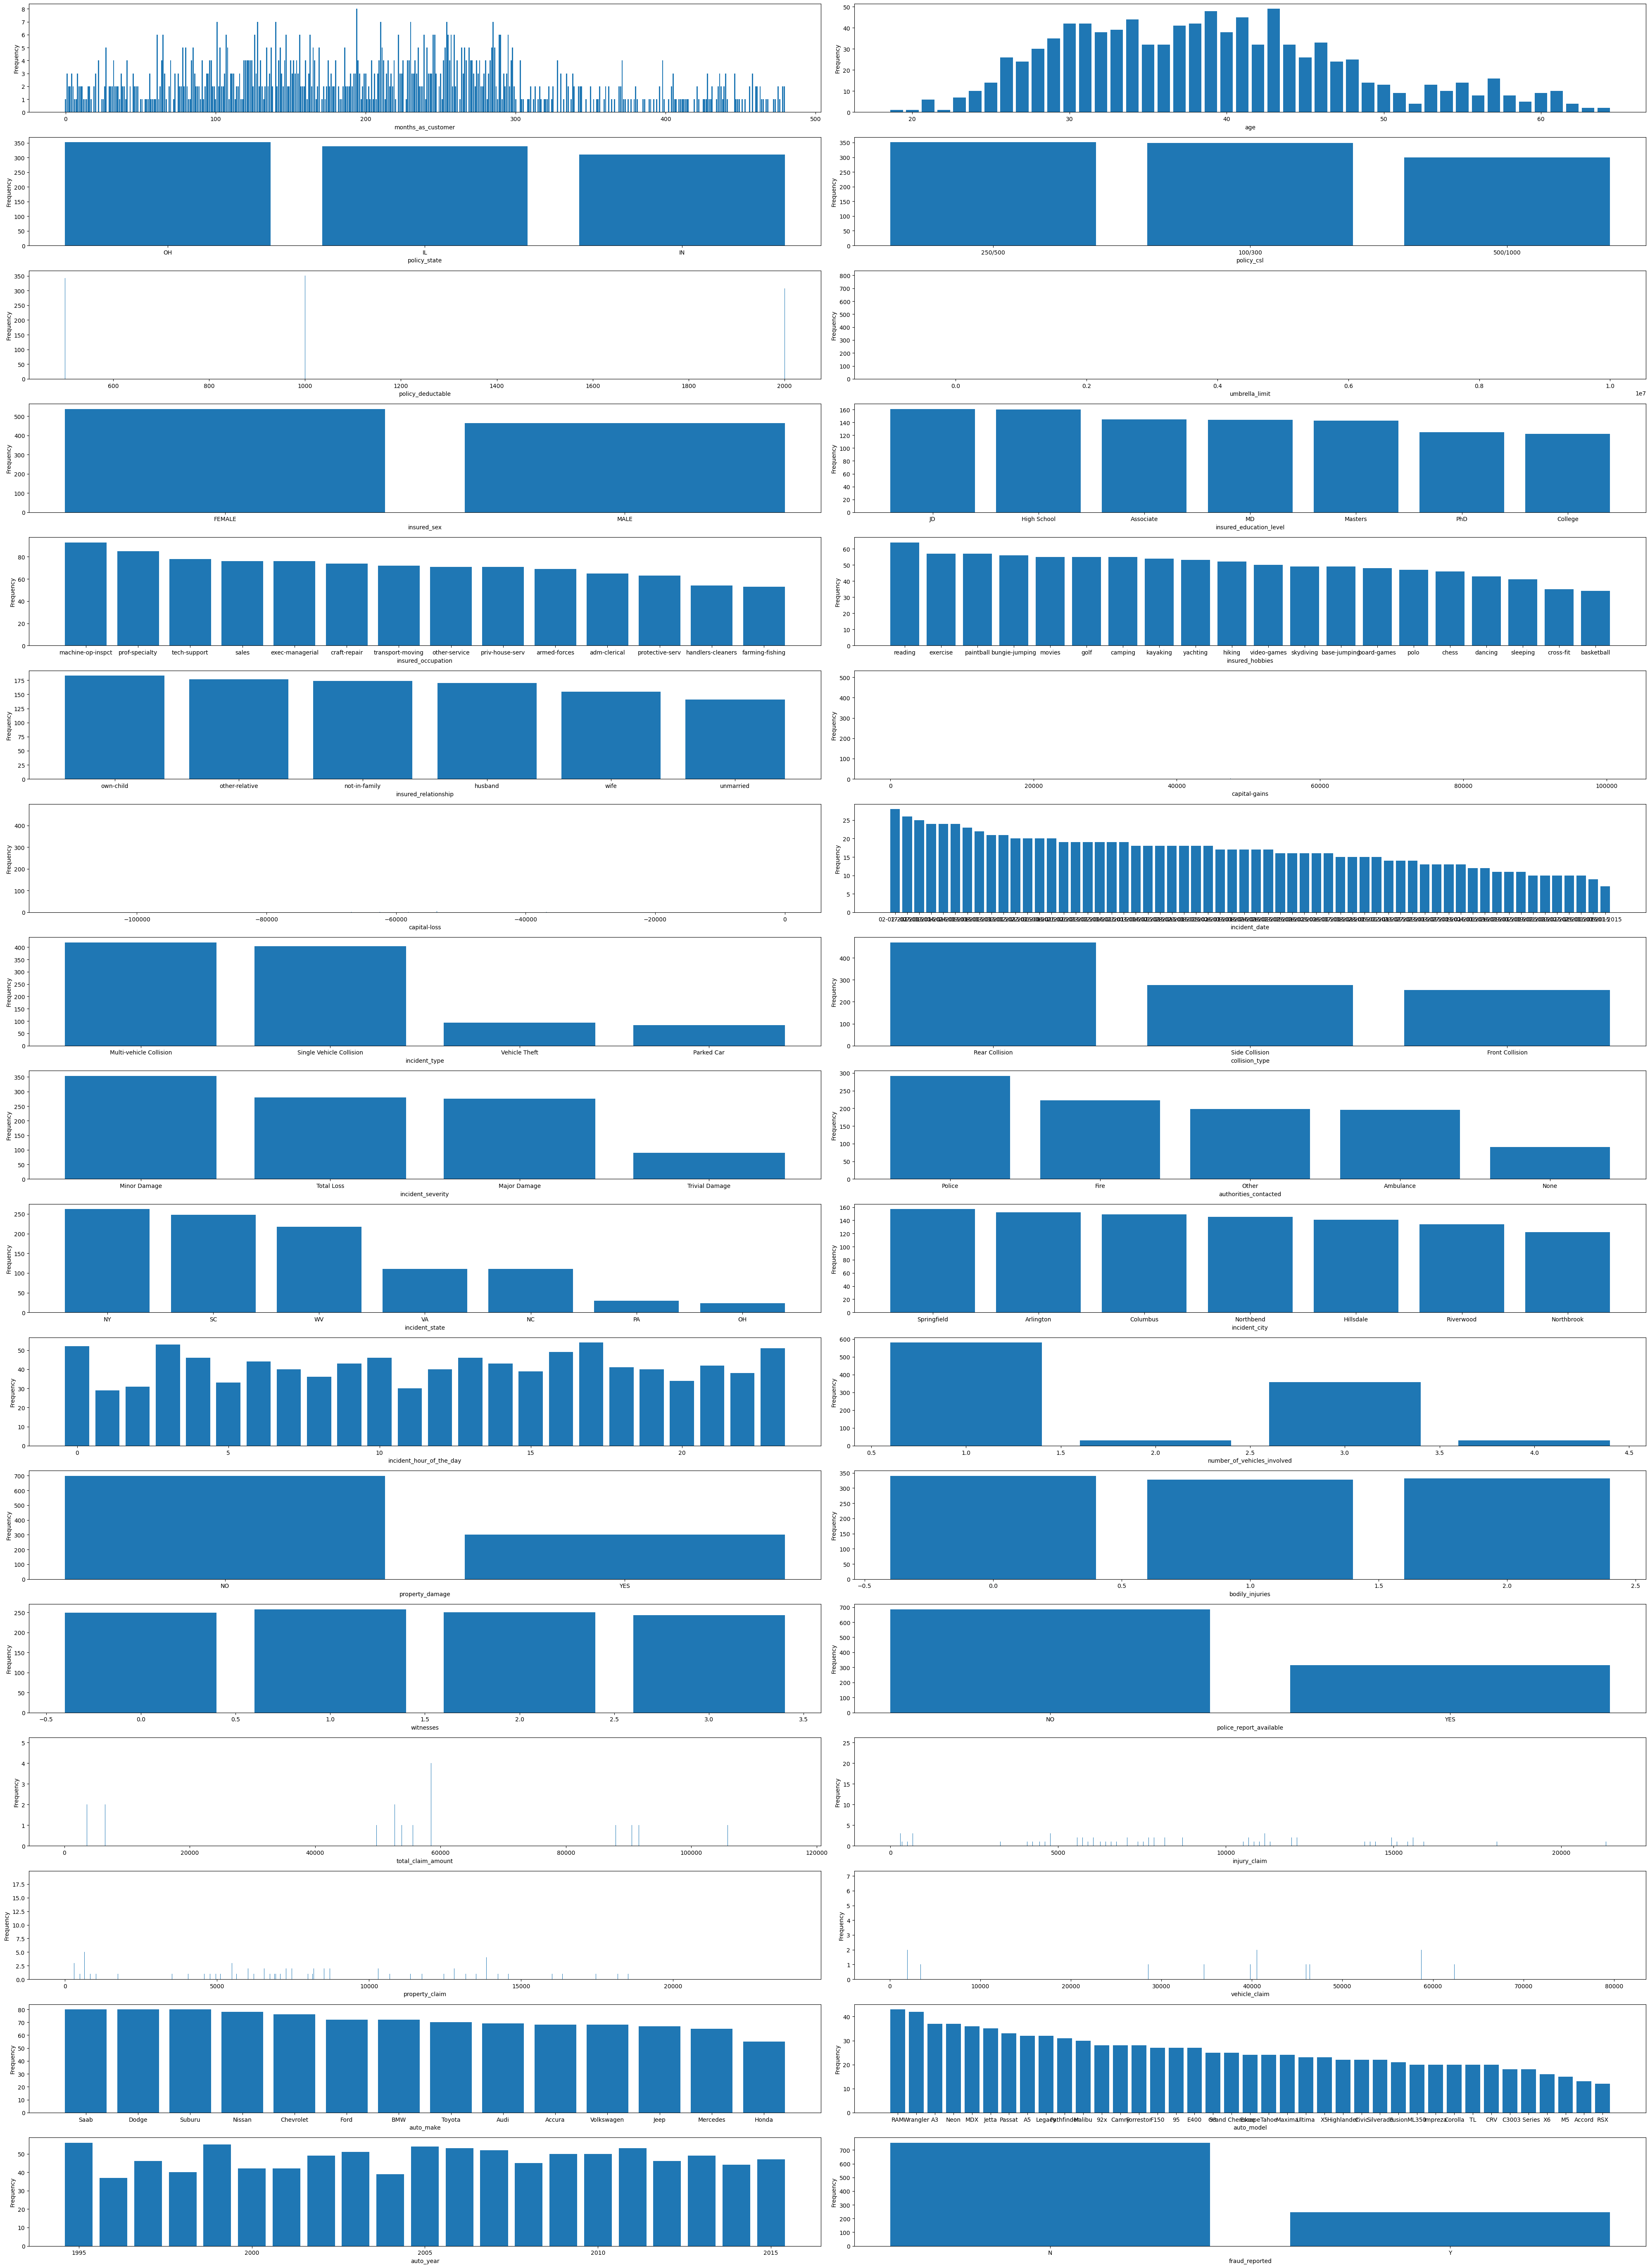

In [13]:
plt.figure(figsize=(40,55))
iterator=1
for i,col in enumerate(df.columns):
    if iterator <=34:
        value=df[col].value_counts()
        ax=plt.subplot(17, 2, iterator)
        plt.bar(value.index,value.values)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator+=1
plt.tight_layout()

#### Data of Person mostly involved are:<br>
Age 43, Female, having policy in Ohio state, and incident happening in NY state and Springfield city, having insurance of 200months, are having either JD or high school level of education, working as machine op inspct, with reading hobby, havig own-child insured, have contacted police
#### Accident Data here indicates:<br>
Is a multi vehicle collision, where collision is of rear type,have incurred minor damages, where incident happened mostly in the low light time, where only 1 vehicle was involved , having 0 body injuries, with 1 wintess and no police report available<br>
#### Automobile data indicates:<br>
Auto make of Saab, Dodge, Suburu, Auto Model as RAM,manufacture in 1995 and 1999.

## 4.2 Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

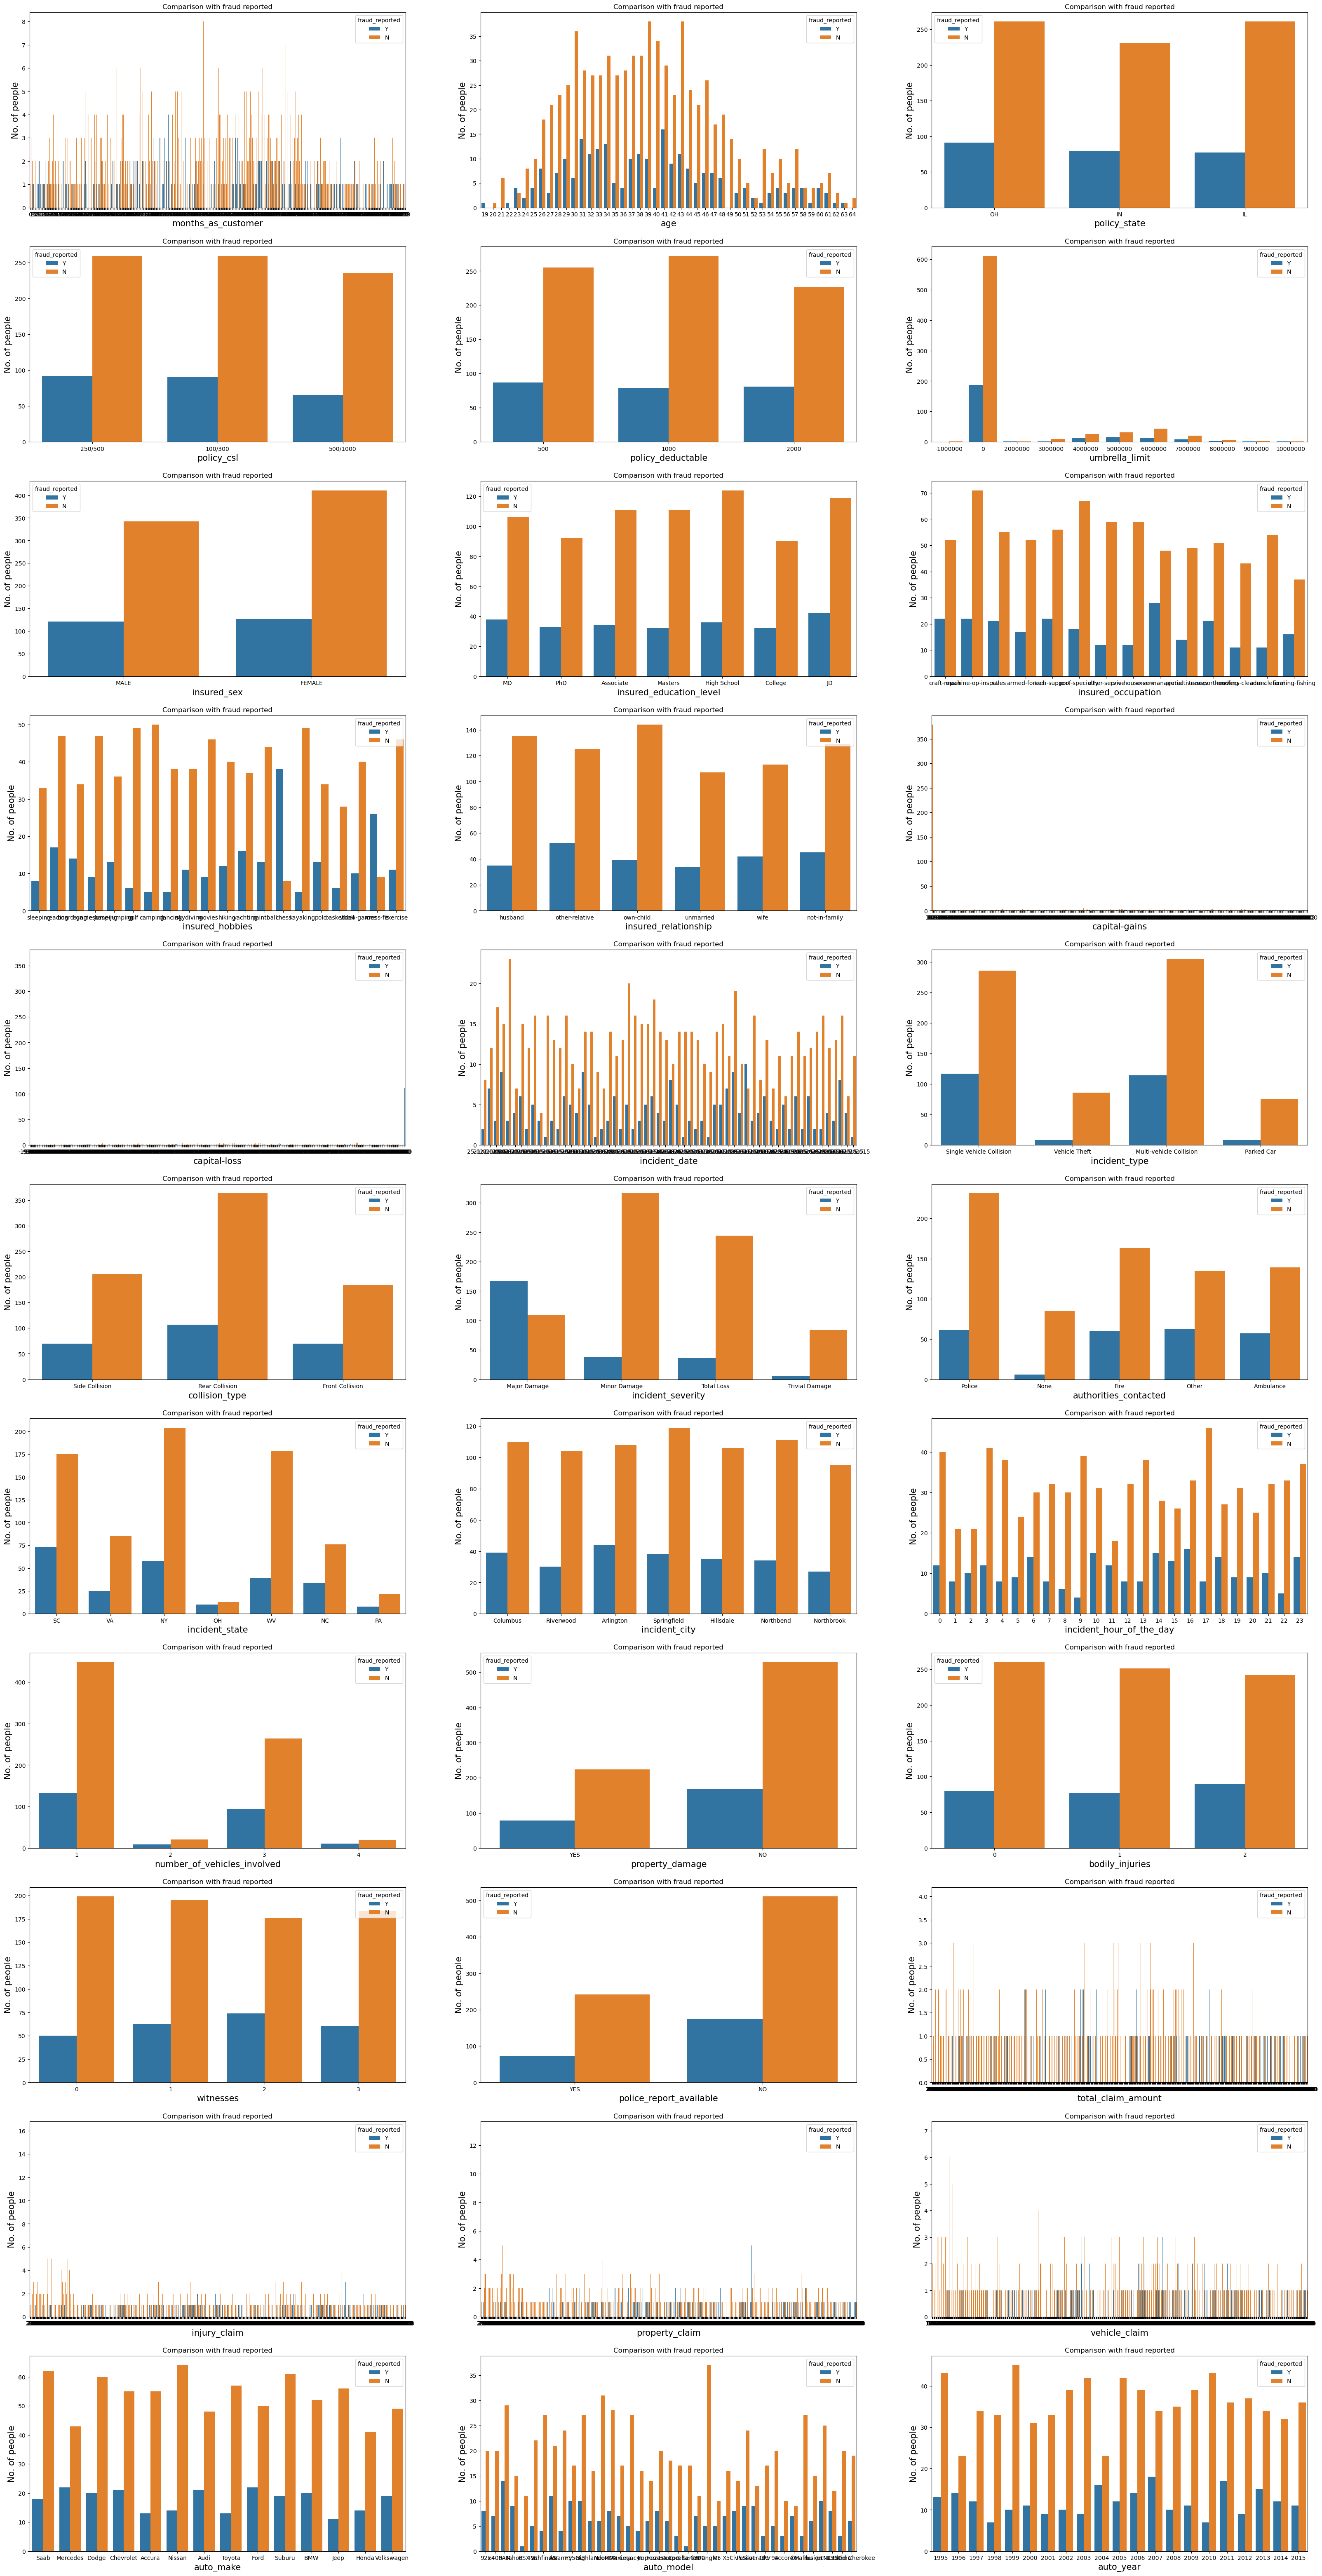

In [14]:
plt.figure(figsize=(40,80))
iterator=1
for col in df.columns:
    if iterator <= 33:
        plt.subplot(11,3,iterator)
        sns.countplot(data=df, x=col,hue='fraud_reported')
        plt.title('Comparison with fraud reported')
        plt.xlabel(col, fontsize=15)
        plt.ylabel('No. of people', fontsize=15)
        iterator+=1 
plt.show

## 4.3 Encoding of Categorical columns

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i])
        df[i]=df[i].astype('float64')

## 4.4 Description of Dataset

In [16]:
df.describe().T

count         mean           std        min  \
months_as_customer           1000.0      203.954  1.151132e+02        0.0   
age                          1000.0       38.948  9.140287e+00       19.0   
policy_state                 1000.0        1.014  8.309600e-01        0.0   
policy_csl                   1000.0        0.951  8.045162e-01        0.0   
policy_deductable            1000.0     1136.000  6.118647e+02      500.0   
umbrella_limit               1000.0  1101000.000  2.297407e+06 -1000000.0   
insured_sex                  1000.0        0.463  4.988786e-01        0.0   
insured_education_level      1000.0        2.966  1.948497e+00        0.0   
insured_occupation           1000.0        6.653  4.019048e+00        0.0   
insured_hobbies              1000.0        9.731  5.674049e+00        0.0   
insured_relationship         1000.0        2.416  1.681003e+00        0.0   
capital-gains                1000.0    25126.100  2.787219e+04        0.0   
capital-loss                 1000.0   -26793.700  2.810410e+04  -111100.0   
incident_date                1000.0       29.376  1.724987e+01        0.0   
incident_type                1000.0        1.172  1.081474e+00        0.0   
collision_type               1000.0        1.022  7.280426e-01        0.0   
incident_severity            1000.0        1.184  9.396952e-01        0.0   
authorities_contacted        1000.0        2.167  1.532142e+00        0.0   
incident_state               1000.0        3.242  2.155942e+00        0.0   
incident_city                1000.0        2.966  2.044266e+00        0.0   
incident_hour_of_the_day     1000.0       11.644  6.951373e+00        0.0   
number_of_vehicles_involved  1000.0        1.839  1.018880e+00        1.0   
property_damage              1000.0        0.302  4.593550e-01        0.0   
bodily_injuries              1000.0        0.992  8.201272e-01        0.0   
witnesses                    1000.0        1.487  1.111335e+00        0.0   
police_report_available      1000.0        0.314  4.643486e-01        0.0   
total_claim_amount           1000.0    52761.940  2.640153e+04      100.0   
injury_claim                 1000.0     7433.420  4.880952e+03        0.0   
property_claim               1000.0     7399.570  4.824726e+03        0.0   
vehicle_claim                1000.0    37928.950  1.888625e+04       70.0   
auto_make                    1000.0        6.546  4.034869e+00        0.0   
auto_model                   1000.0       19.318  1.113611e+01        0.0   
auto_year                    1000.0     2005.103  6.015861e+00     1995.0   
fraud_reported               1000.0        0.247  4.314825e-01        0.0   

                                  25%      50%       75%         max  
months_as_customer             115.75    199.5    276.25       479.0  
age                             32.00     38.0     44.00        64.0  
policy_state                     0.00      1.0      2.00         2.0  
policy_csl                       0.00      1.0      2.00         2.0  
policy_deductable              500.00   1000.0   2000.00      2000.0  
umbrella_limit                   0.00      0.0      0.00  10000000.0  
insured_sex                      0.00      0.0      1.00         1.0  
insured_education_level          1.00      3.0      5.00         6.0  
insured_occupation               3.00      7.0     10.00        13.0  
insured_hobbies                  5.00     10.0     15.00        19.0  
insured_relationship             1.00      2.0      4.00         5.0  
capital-gains                    0.00      0.0  51025.00    100500.0  
capital-loss                -51500.00 -23250.0      0.00         0.0  
incident_date                   14.75     29.5     44.00        59.0  
incident_type                    0.00      1.0      2.00         3.0  
collision_type                   0.00      1.0      2.00         2.0  
incident_severity                0.00      1.0      2.00         3.0  
authorities_contacted            1.00      2.0      4.00

Summary:<br>
1. Mean ~ Median:<br>
'age','policy_state','policy_csl','insured_education_level','insured_occupation','insured_hobbies','incident_date','auto_model	','auto_year','fraud_reported'<br>
2. Mean > Median:<br>
'months_as_customer', 'policy_deductable','umbrella_limit','insured_sex','insured_relationship','capital-gains' ,'incident_type','incident_severity','authorities_contacted','number_of_vehicles_involved','witnesses','injury_claim','property_claim'<br>
3. Mean < meadian:<br>
'capital-loss','collision_type','incident_state','incident_city','incident_hour_of_the_day','property_damage','bodily_injuries','police_report_available','total_claim_amount','vehicle_claim','auto_make'<br>

## 4.5 Checking and Removal of skewness - Using Distplot

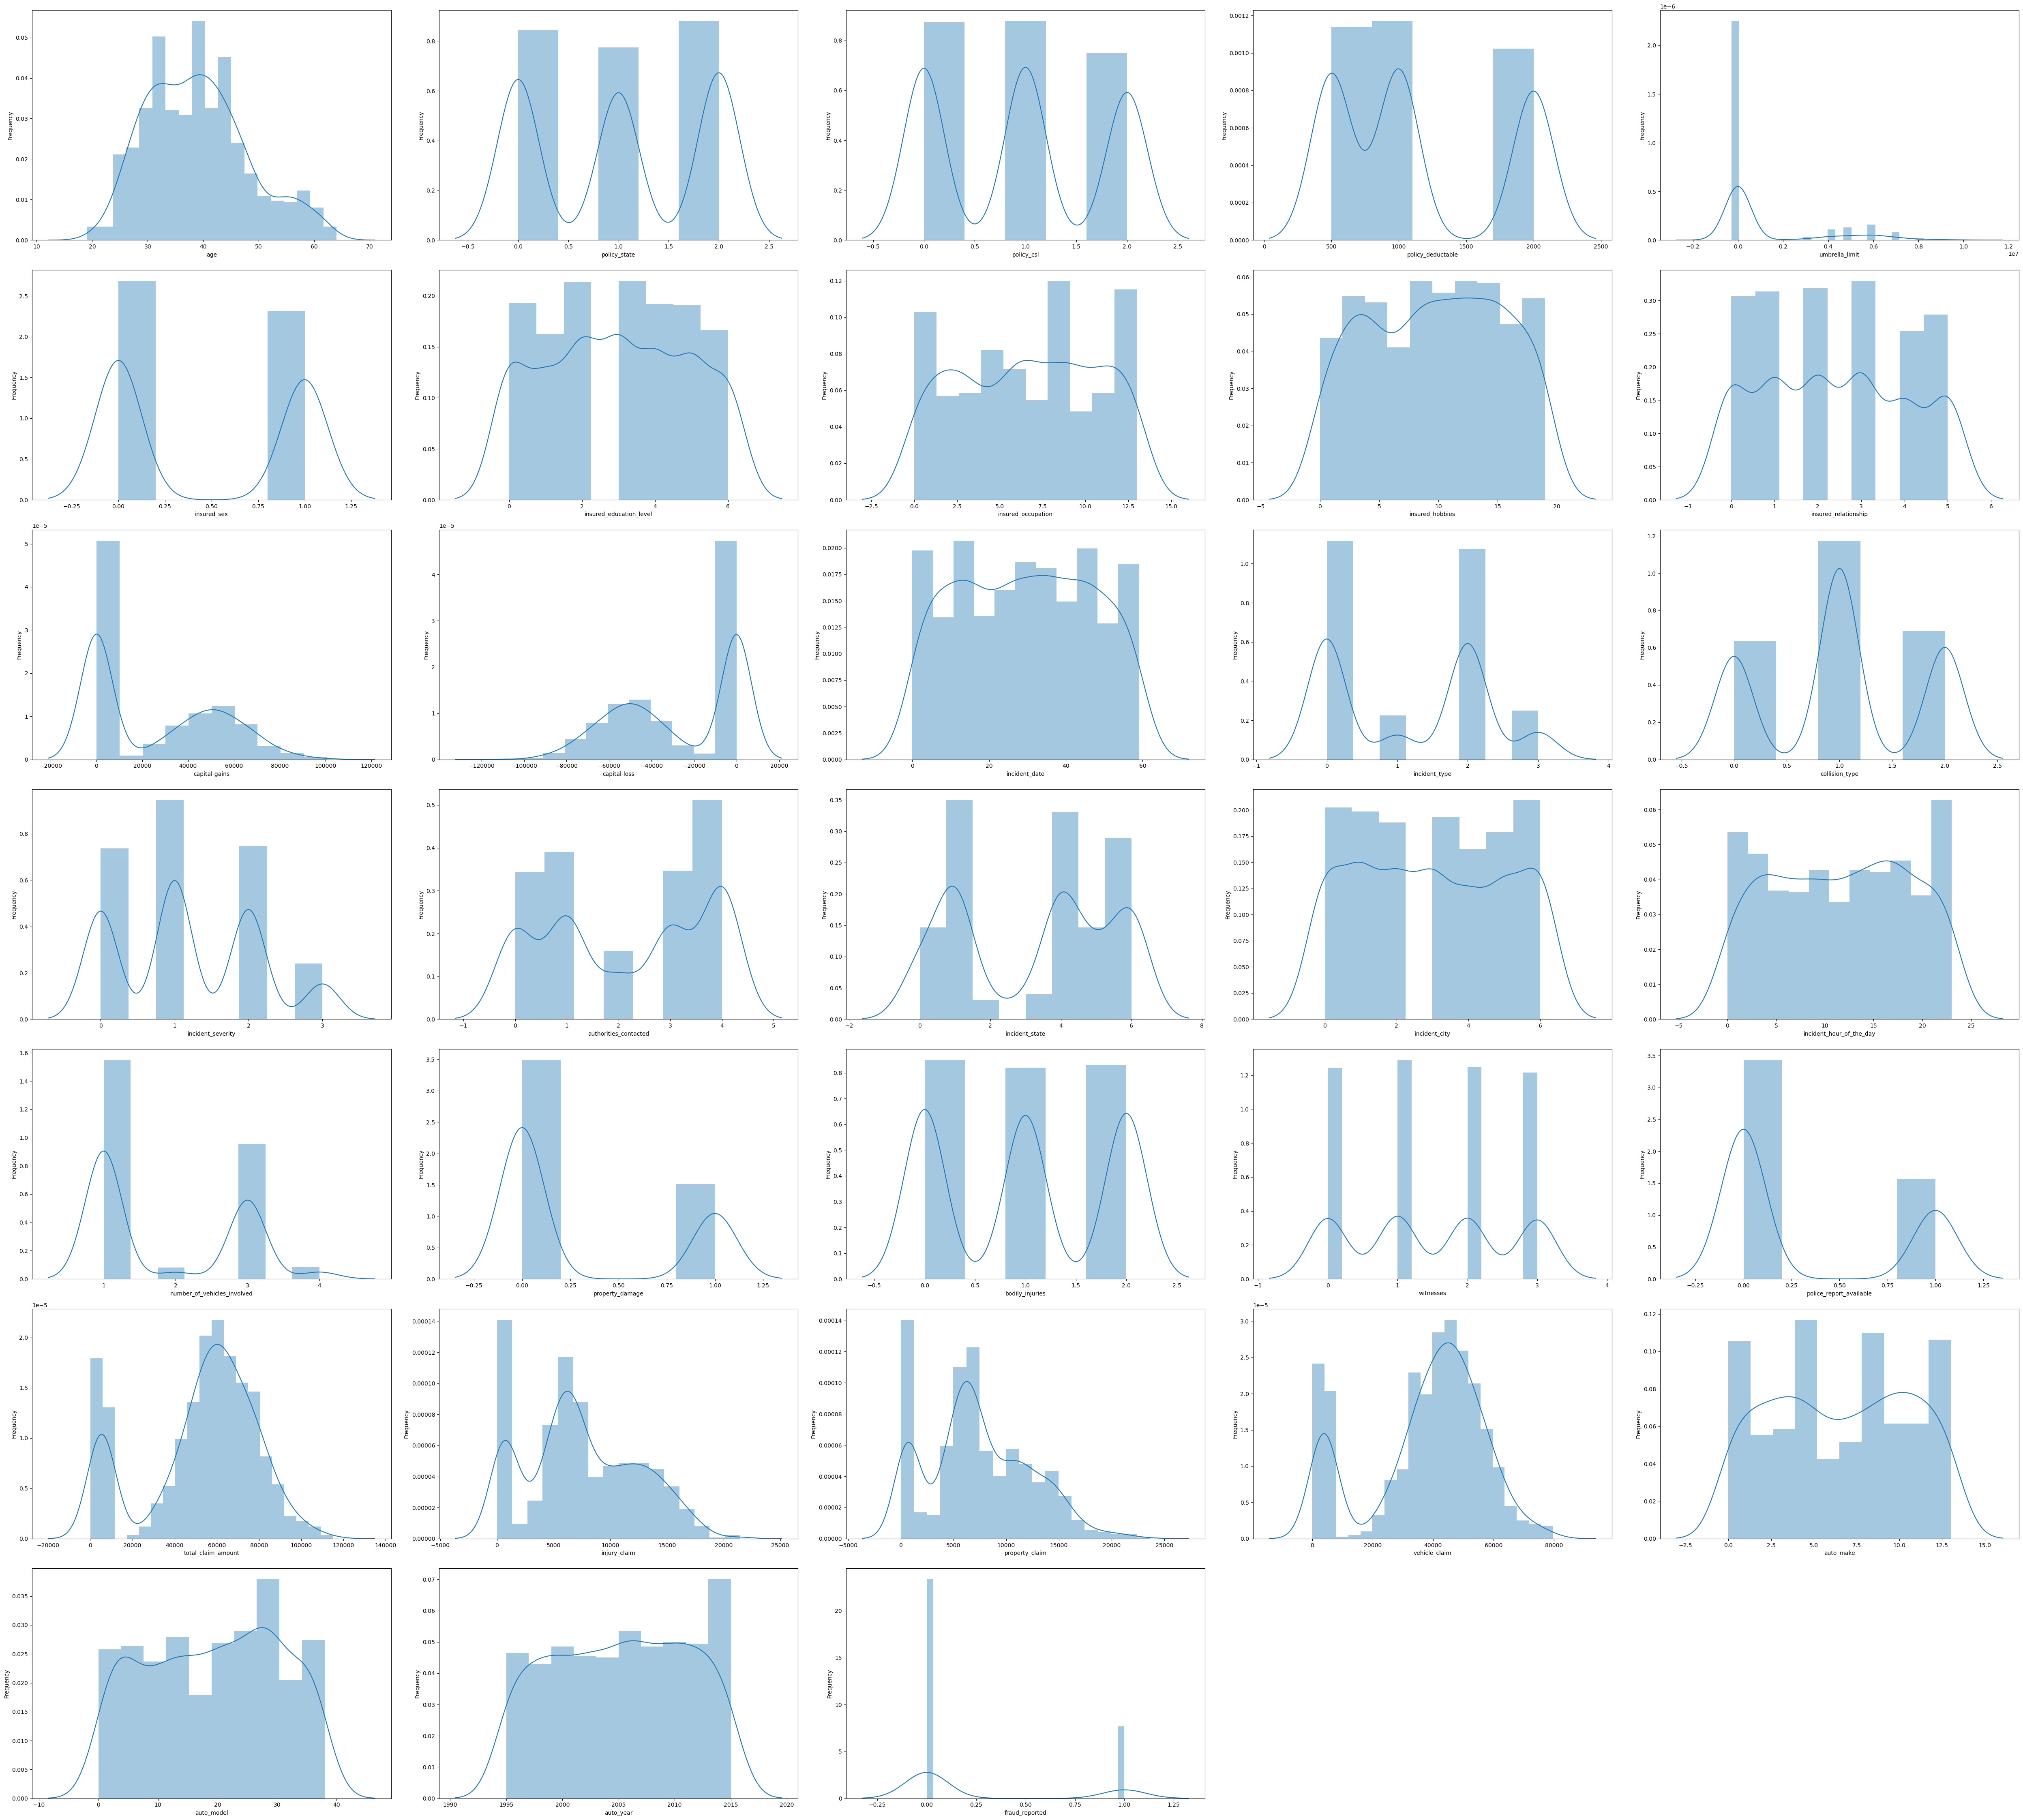

In [17]:
plt.figure(figsize=(50,45))
iterator=1
for i in df.columns[1:]:
    if iterator<=33:
        ax=plt.subplot(7, 5, iterator)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency',fontsize=10)
    iterator+=1
plt.tight_layout()

Since most of the columns are categorical columns, so data is not evenly distributed rather it is available in particular values.<br>
We will check for skewness and try to remove skewness.

In [18]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


#Checking skewness in input variables:<br>
1. Columns with moderate skewness (-1 to -0.5 & 0.5 to 1):<br>
property_damage, police_report_available, total_claim_amount, vehicle_claim
2. Columns with high skewness (<-1 & >1):<br>
umbrella_limit

In [19]:
#Transforming skewed data

list=[np.log, np.cbrt, np.sqrt, np.exp]
column_list=['umbrella_limit','property_damage','police_report_available']
skewness_output=[]

for column in column_list:
    row=[column]
    for func in list:
            x=func(df[column])
            skewness=pd.Series(x).skew()
            row.append(skewness)
    skewness_output.append(row)

skewness_df=pd.DataFrame(skewness_output, columns=['Columns','Log','Cube Root','Square Root','Exponential'])
print(skewness_df)

                   Columns  Log  Cube Root  Square Root  Exponential
0           umbrella_limit  NaN   1.523380     1.578304          NaN
1          property_damage  NaN   0.863806     0.863806     0.863806
2  police_report_available  NaN   0.802728     0.802728     0.802728


We found that, there is no change in skewness for property_damage and police_report_available. <br>
Also,skewness of umbrella_limit didn't came in the range<br>
So we will not transform these columns and try to remove the outliers from these.

## 4.6 Checking and Removal of Outliers - using Boxplot

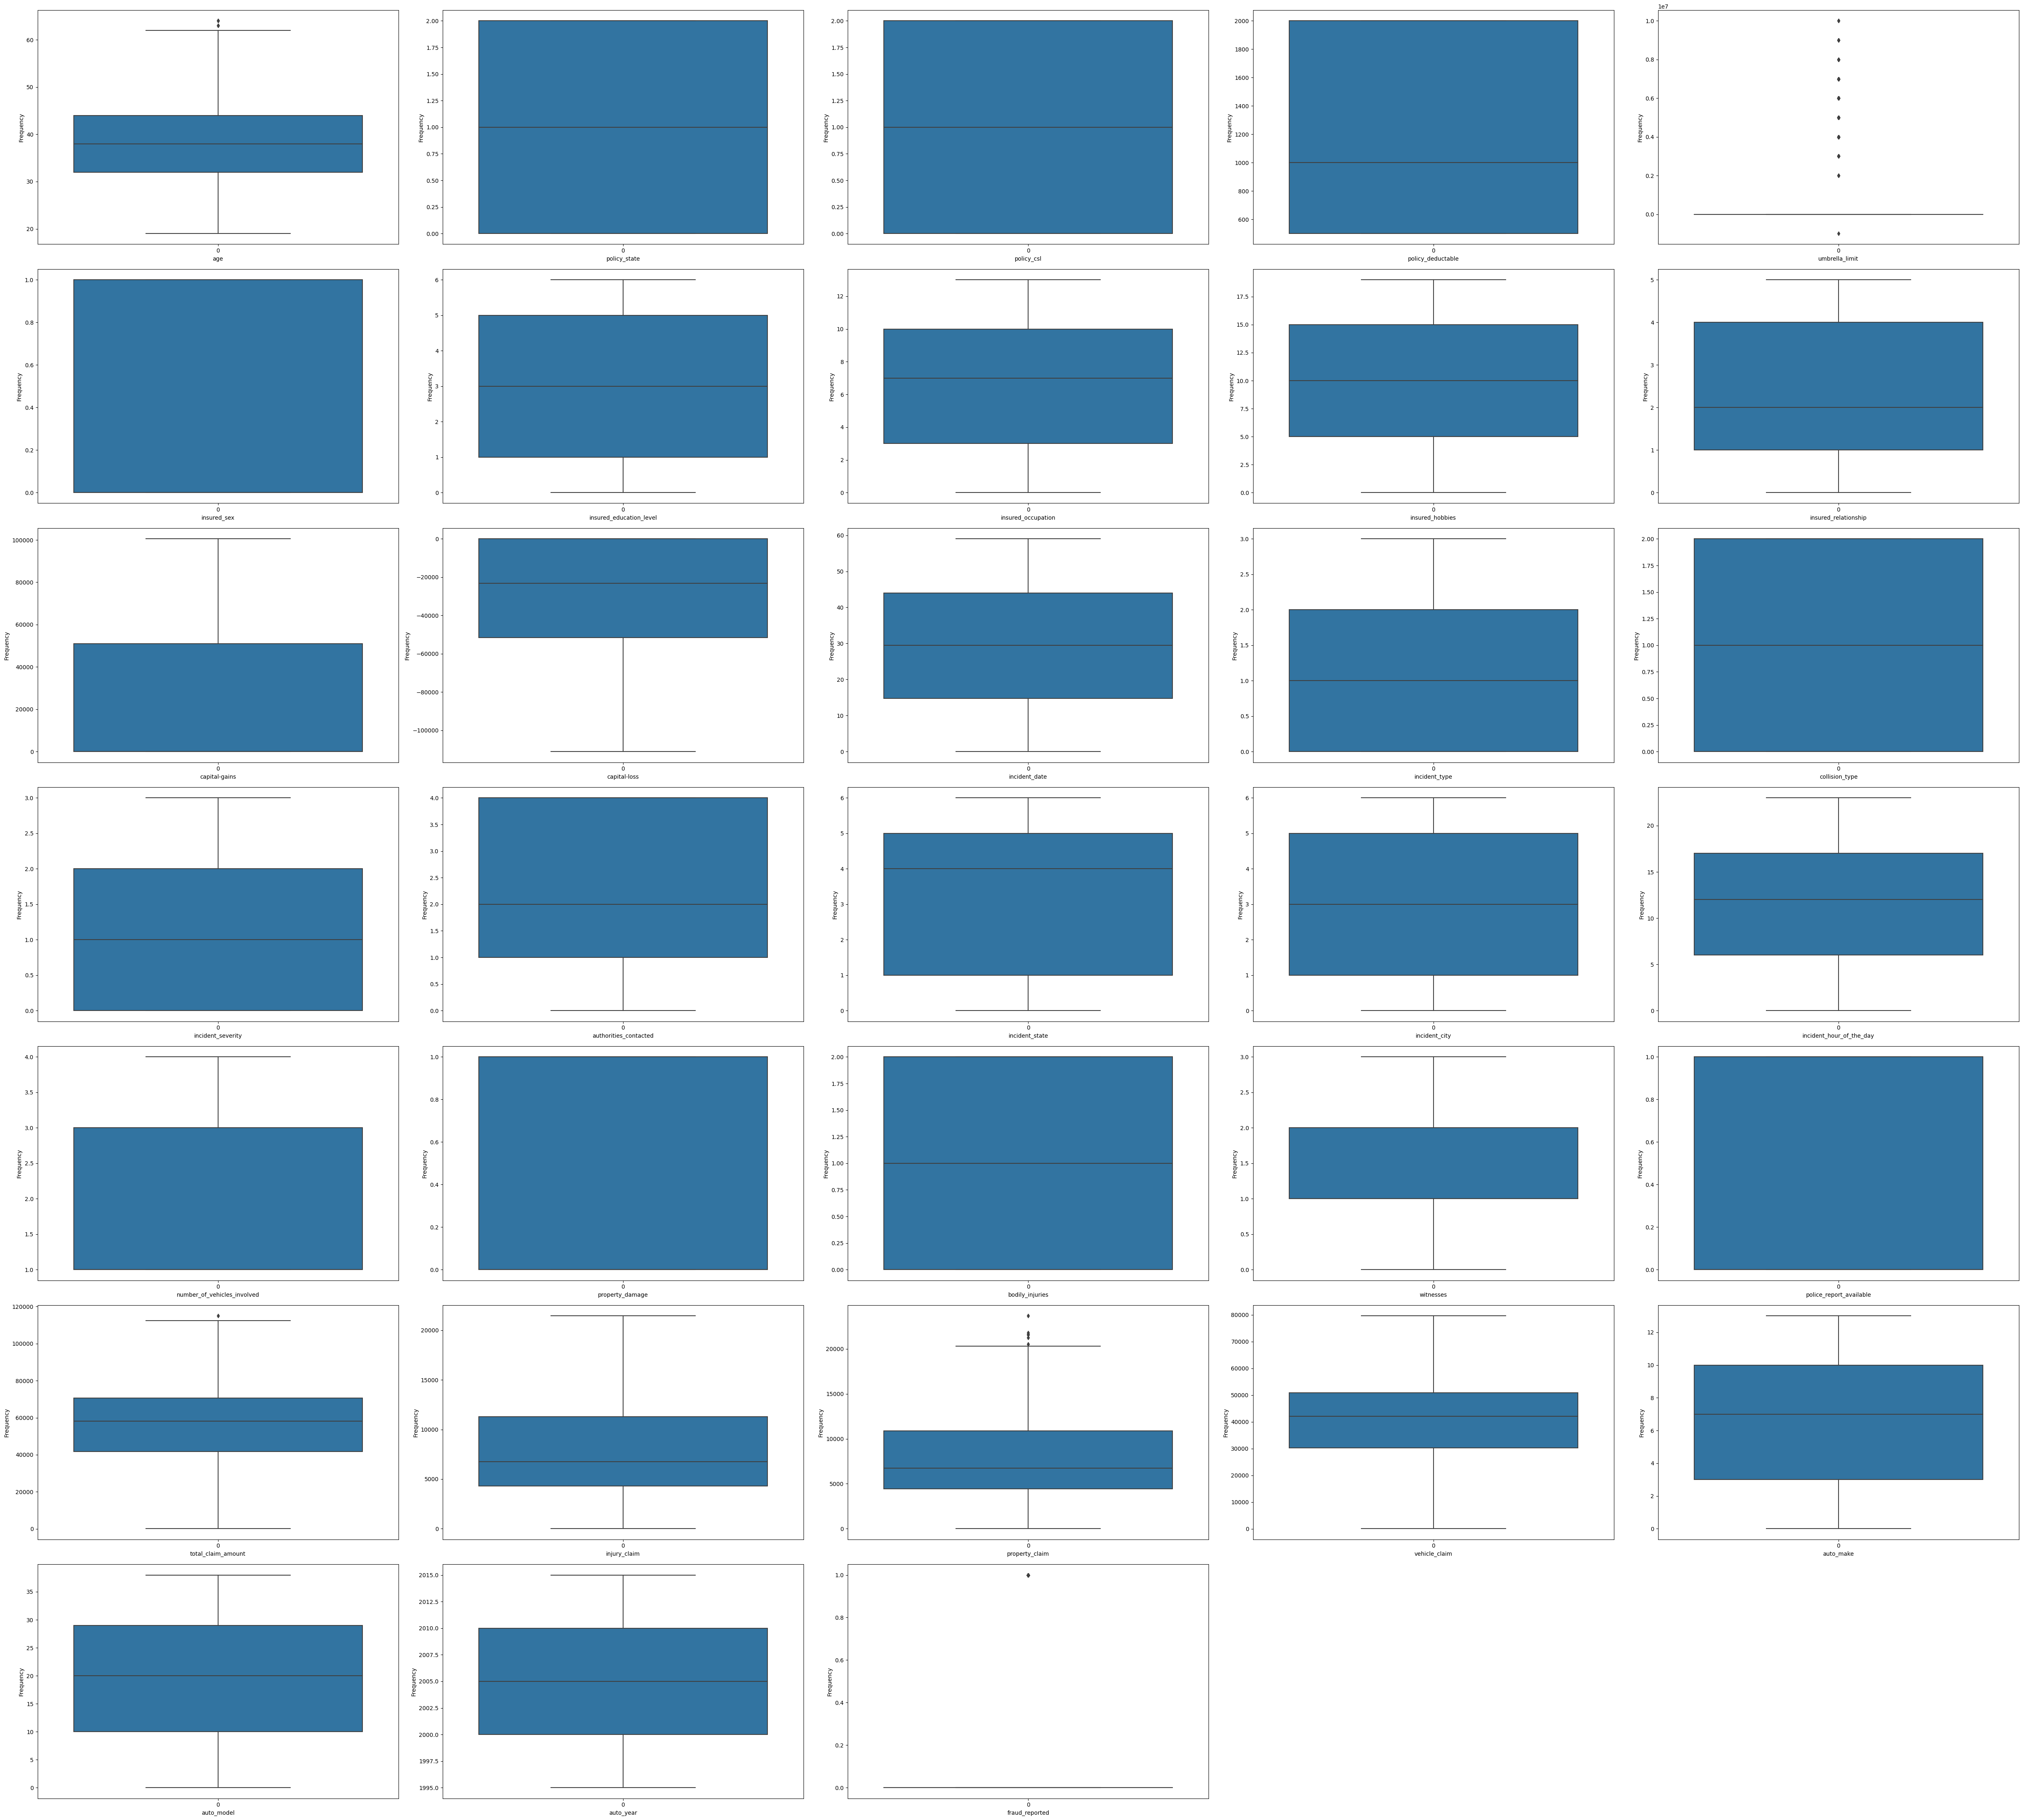

In [20]:
plt.figure(figsize=(50,45))
iterator=1
for i in df.columns[1:]:
    if iterator<=33:
        ax=plt.subplot(7, 5, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency',fontsize=10)
    iterator+=1
plt.tight_layout()

Outliers are present in <br>
age, total_claim_amount, property_claim.

We will remove outliers from these.

In [21]:
### 6.3.2 Removal of Outliers using Interquantile method
list = ['age','total_claim_amount','property_claim']
for i in list:
    q75,q25=np.percentile(df[i],[75,25])
    intr_qr=q75-q25
    
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    
    df.loc[df[i]<min,i]=np.nan
    df.loc[df[i]>max,i]=np.nan

In [22]:
df.isnull().sum()

months_as_customer             0
age                            4
policy_state                   0
policy_csl                     0
policy_deductable              0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             1
injury_claim                   0
property_claim                 6
vehicle_claim                  0
auto_make 

In [23]:
#Dropping NaN values and checking for null values if present
df.dropna(subset=['age','total_claim_amount','property_claim'],inplace=True)
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

## 4.7 Checking for correlation- Using Heatmap

<Axes: >

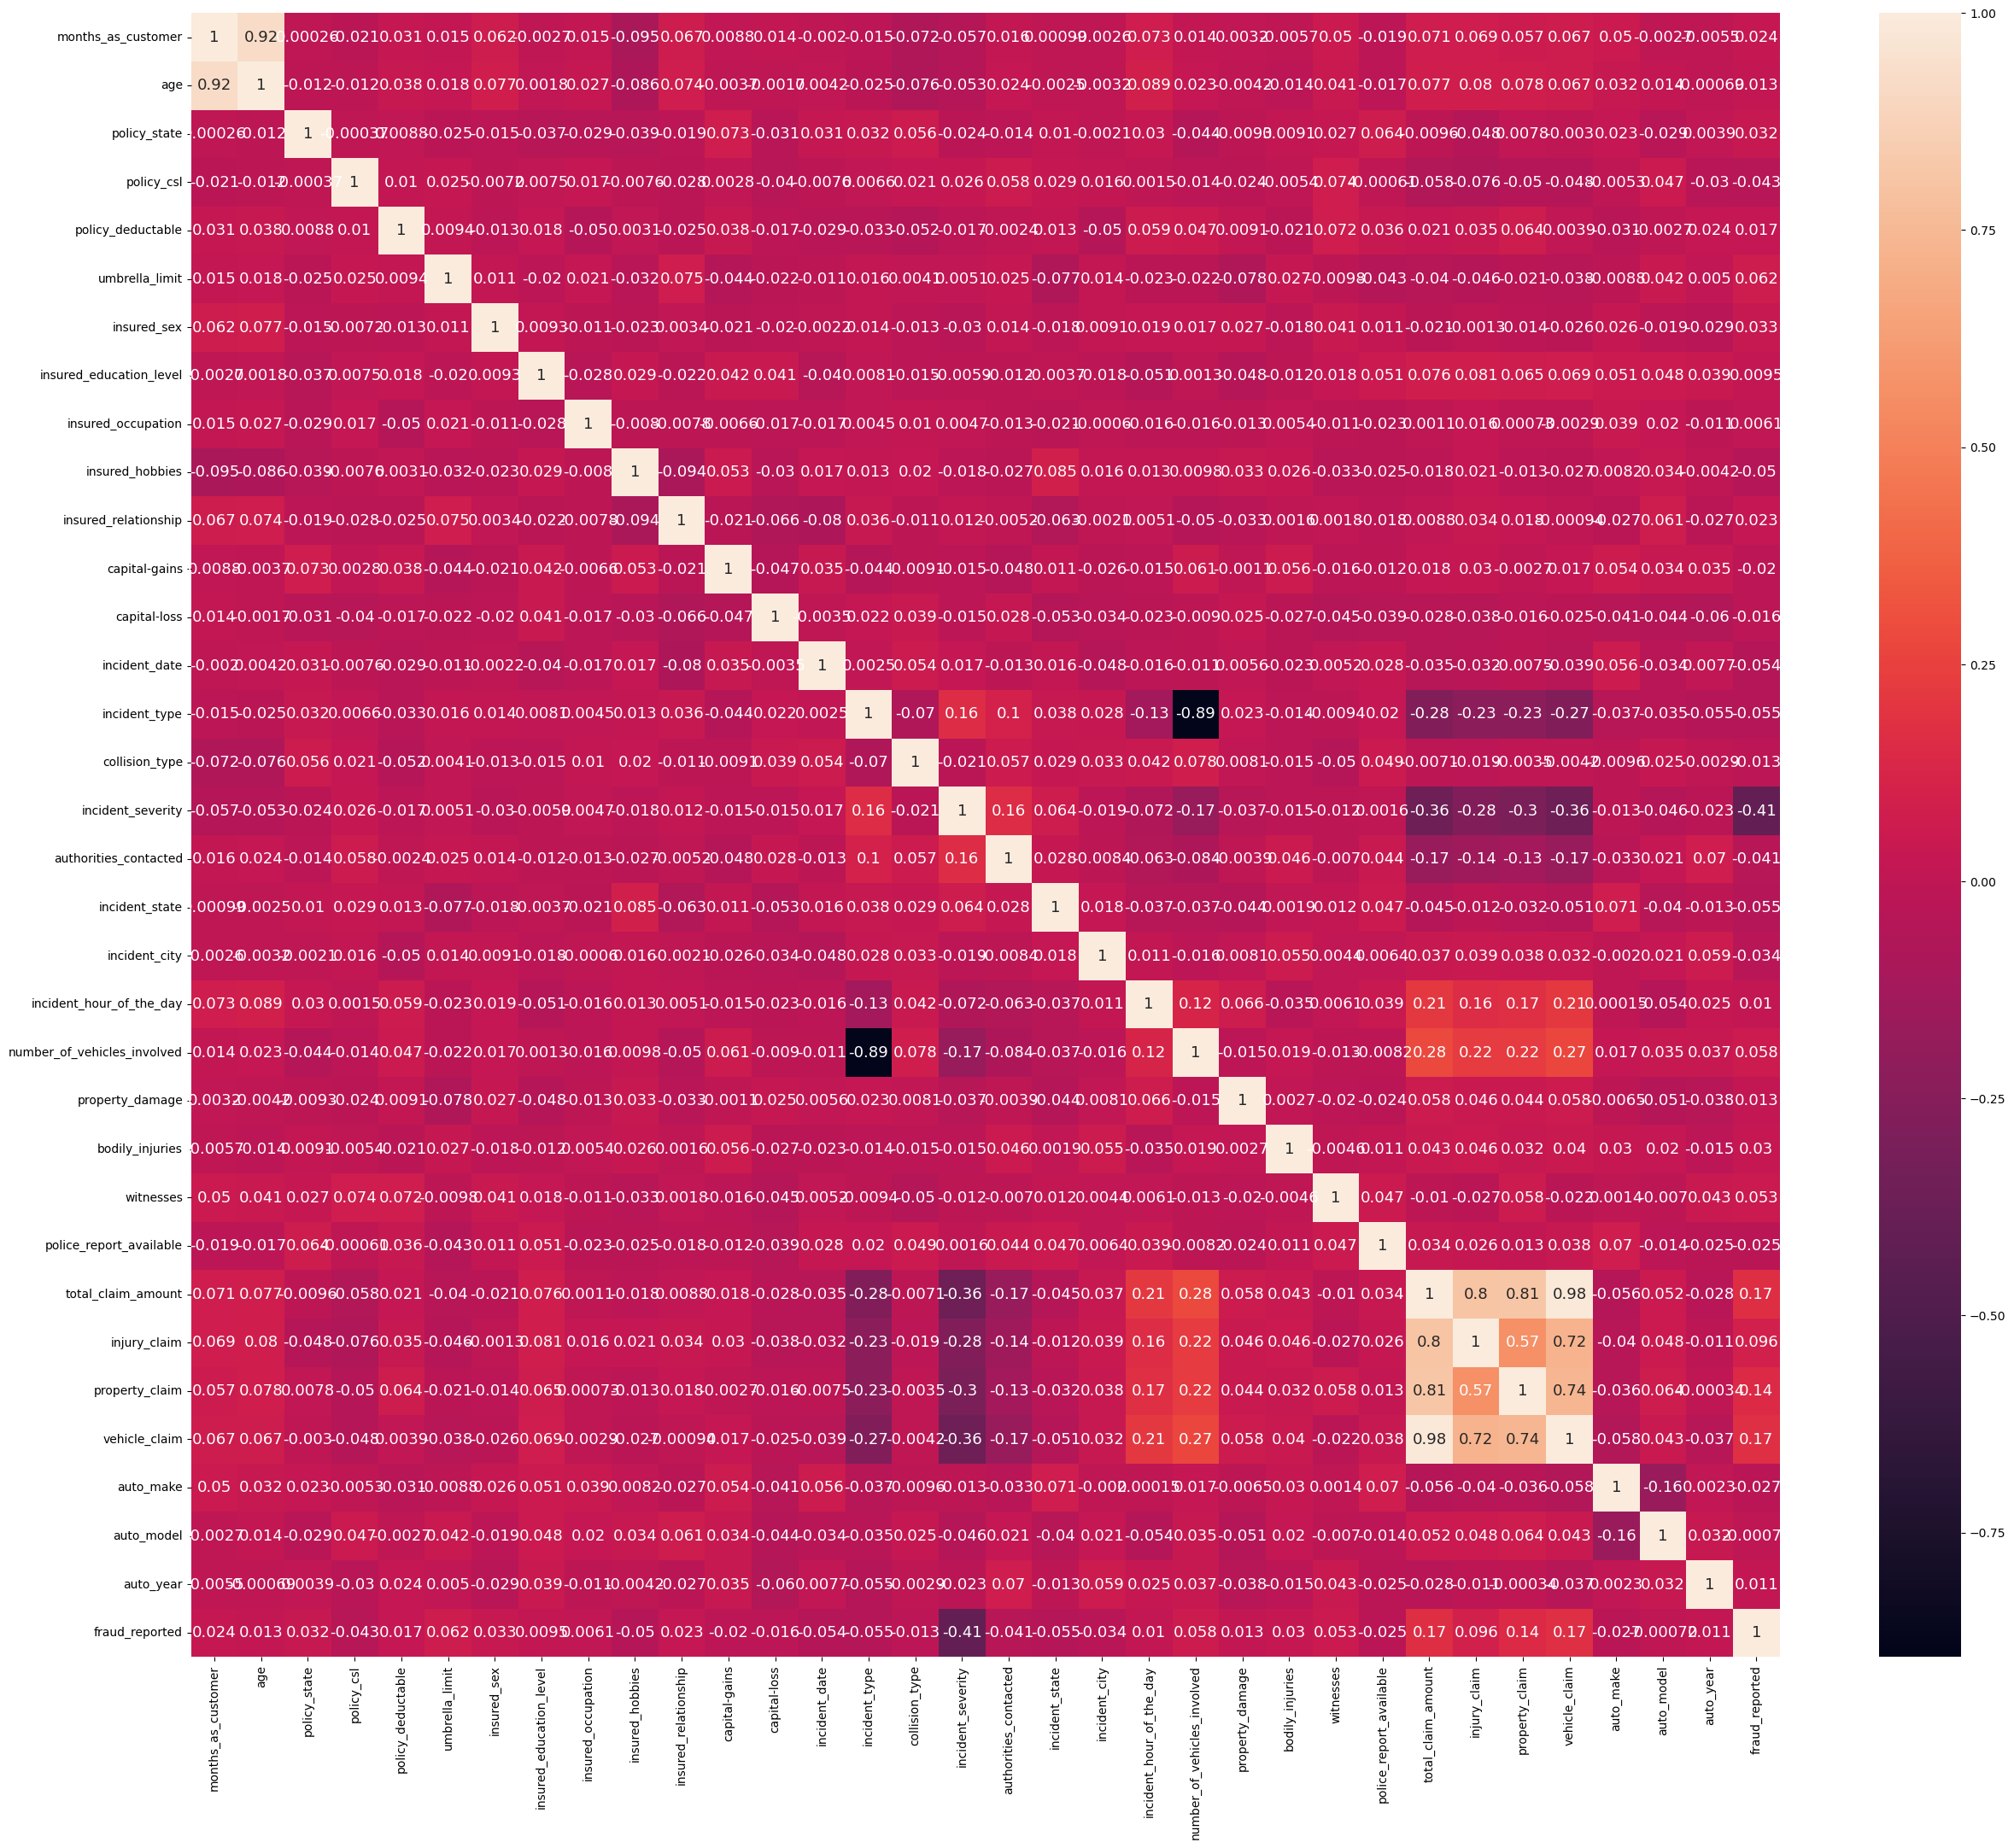

In [24]:
#Checking correlation among variables and among target.
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True,annot_kws={'size':13})

There's not much of correlation in the data.

# 5. Taking x & y from table and transforming using PCA Class

In [25]:
x=df.drop('fraud_reported', axis=1)
x

months_as_customer   age  policy_state  policy_csl  policy_deductable  \
0                   328  48.0           2.0         1.0               1000   
1                   228  42.0           1.0         1.0               2000   
2                   134  29.0           2.0         0.0               2000   
3                   256  41.0           0.0         1.0               2000   
4                   228  44.0           0.0         2.0               1000   
..                  ...   ...           ...         ...                ...   
995                   3  38.0           2.0         2.0               1000   
996                 285  41.0           0.0         0.0               1000   
997                 130  34.0           2.0         1.0                500   
998                 458  62.0           0.0         2.0               2000   
999                 456  60.0           2.0         1.0               1000   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
0                 0          1.0                      4.0                 2.0   
1           5000000          1.0                      4.0                 6.0   
2           5000000          0.0                      6.0                11.0   
3           6000000          0.0                      6.0                 1.0   
4           6000000          1.0                      0.0                11.0   
..              ...          ...                      ...                 ...   
995               0          0.0                      5.0                 2.0   
996               0          0.0                      6.0                 9.0   
997         3000000          0.0                      5.0                 1.0   
998         5000000          1.0                      0.0                 5.0   
999               0          0.0                      0.0                11.0   

     insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0               17.0                   0.0          53300             0   
1               15.0                   2.0              0             0   
2                2.0                   3.0          35100             0   
3                2.0                   4.0          48900        -62400   
4                2.0                   4.0          66000        -46000   
..               ...                   ...            ...           ...   
995             13.0                   4.0              0             0   
996             17.0                   5.0          70900             0   
997              3.0                   2.0          35100             0   
998              0.0                   5.0              0             0   
999             11.0                   0.0              0             0   

     incident_date  incident_type  collision_type  incident_severity  \
0             49.0            2.0             2.0                0.0   
1             41.0            3.0             1.0                1.0   
2             44.0            0.0             1.0                1.0   
3             19.0            2.0             0.0                0.0   
4             34.0            3.0             1.0                1.0   
..             ...            ...             ...                ...   
995           44.0            2.0             0.0                1.0   
996           47.0            2.0             1.0                0.0   
997           45.0            0.0             2.0                1.0   
998           52.0            2.0             1.0                0.0   
999           52.0            1.0             1.0                1.0   

     authorities_contacted  incident_state  incident_city  \
0                      4.0             4.0            1.0   
1                      4.0             5.0            5.0   
2                      4.0             1.0            1.0   
3                      4.0             2.0            0.0   
4                      2

In [26]:
x.shape

(989, 33)

In [27]:
from sklearn.decomposition import PCA
pca=PCA(n_components=25)

In [28]:
y=df['fraud_reported']

In [29]:
xnew=pca.fit_transform(x)

In [30]:
xnew.shape

(989, 25)

In [31]:
pd.DataFrame(data=xnew)

0             1             2             3            4   \
0   -1.102158e+06  22308.654444  -4180.537170  38736.752383  1329.749127   
1    3.897915e+06 -60996.683616 -29137.770931    178.998086  -739.577583   
2    3.897876e+06 -22893.839436 -10154.421072  27136.597407 -2696.858170   
3    4.897863e+06  23598.800399  40677.265526  -2612.490753  5853.727771   
4    4.897890e+06 -49837.737134  48477.292446  19574.551625  -641.157247   
..            ...           ...           ...           ...          ...   
984 -1.102140e+06  37257.422621 -41552.373955   -715.622452 -2400.011261   
985 -1.102192e+06  66261.631436   2419.865786  52751.926878 -5979.999982   
986  1.897852e+06  19285.438360 -15495.932259  26841.382182  4492.436985   
987  3.897885e+06  -7774.168546 -35444.241449   1261.836326  2887.459054   
988 -1.102084e+06 -63729.757579 -29627.485693  -2765.520424  -399.879905   

              5           6           7          8          9          10  \
0   -4663.471263 -179.409619  120.849188 -19.383870  17.438020   8.382635   
1     241.050125  889.708843   29.811357 -12.400793   5.606456   1.053769   
2    2548.054239  843.491404  -77.112224 -14.748419 -11.325518   3.239049   
3     601.193321  899.019647   44.121668   9.419164 -13.698949   6.466475   
4     381.895034 -180.126083   35.383328  -2.160534 -10.491235 -11.828073   
..           ...         ...         ...        ...        ...        ...   
984  5902.530225  -98.258695 -213.802022 -17.223008  12.467836  -7.507635   
985 -1060.140301 -275.422520   60.701729 -16.695912  -6.799197 -10.467939   
986   547.826794 -582.294947  -76.859095 -16.001228  -0.077035   9.004779   
987   592.343869  928.416971  249.016204 -24.981119  11.753347  12.355977   
988  -218.164810  -93.458466  268.882846 -21.948131   4.056870   3.508375   

            11        12        13        14         15        16        17  \
0    -0.312717 -9.128270  2.595816  3.610024   1.445059 -0.101089  1.872472   
1     1.458398 -6.386808 -0.297538  0.713272   1.606251 -2.053205 -1.632331   
2     2.823618  8.056147 -2.496431 -2.747236  -5.511537  2.073213  1.915305   
3    10.018318  5.750521  6.060585  1.628377  -0.899563  1.352197  3.344887   
4     1.942363  9.166771  0.493072 -8.277110   1.376829  1.805898  2.032353   
..         ...       ...       ...       ...        ...       ...       ...   
984   0.809226 -1.979356  3.513458 -0.537351  13.887108  3.129872 -1.477841   
985   7.622793 -7.214174 -5.764027  4.699524  -3.917887 -0.122592  0.678860   
986  -6.386356  6.691900  2.001519  6.897768   2.615848  3.463081  2.287376   
987  -4.047635  7.495193  5.012410 -5.412273   4.439900  2.091830  1.379205   
988   2.217025 -3.209857 -3.720237 -2.971517   2.323635 -2.403553  1.755082   

           18        19        20        21        22        23        24  
0    0.441487 -1.571086 -2.326710 -1.024596 -0.505962  1.450051  0.456707  
1    1.631787  0.215163 -1.278981 -0.577386  1.538614  0.945228 -0.549737  
2    2.619583  0.176483 -1.004393  2.296220 -1.419577  0.782323  1.190179  
3    2.165783  1.252569 -1.727779 -0.840722 -0.382507  0.668785 -1.509533  
4   -2.613107  0.758939  0.381235 -1.592536  0.384460  0.390637 -1.643000  
..        ...       ...       ...       ...       ...       ...       ...  
984  1.834766  1.895810  0.294007 -1.873234 -0.102630  0.126333  0.610735  
985  2.061674  3.560330  0.031635 -1.925436 -1.280446  0.044669 -0.854985  
986  1.130403 -0.910686 -1.841555  1.829447 -1.846192  0.468743  1.288409  
987 -2.986822  1.930305 -0.607002 -0.439851  0.349698  0.954931 -1.589274  
988 -2.798649 -2.204855 -0.823825  0.197366 -1.490443  0.963218  0.393748  

[989 rows x 25 columns]

# 6. Modelling

## 6.1 Finding best random state model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

maxRS=0
maxAcc=0

for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(xnew,y, test_size=0.2, random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    predRFC=RFC.predict(x_test)
    acc=accuracy_score(y_test, predRFC)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy is", maxAcc)
print("Best Random State", maxRS)
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

Best Accuracy is 0.8484848484848485
Best Random State 95
[[144  13]
 [ 26  15]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       157
         1.0       0.54      0.37      0.43        41

    accuracy                           0.80       198
   macro avg       0.69      0.64      0.66       198
weighted avg       0.78      0.80      0.79       198



## 6.2 Creating Train Test Model

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnew,y,test_size=0.2, random_state=95)

## 6.3 Passing all models at a go

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [40]:
Accuracy_Score=[]
F1_Score=[]
AUC_Score=[]
model = [LogisticRegression(),GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

model_names = ["LogisticRegression", "GaussianNB","Decision Tree Classifier", "SVC", "KNeighbors Classifier","Random Forest Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier"]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    acc= accuracy_score(y_test,predm)
    f1score= f1_score(y_test,predm)
    auc_score=roc_auc_score(y_test, predm)
    
    Accuracy_Score.append(acc)
    F1_Score.append(f1score)
    AUC_Score.append(auc_score)

result_df=pd.DataFrame({
    "Model":model_names,
    "Accuracy Score":Accuracy_Score,
    "F1 Score": F1_Score,
    "AUC Score": AUC_Score
})
print(result_df)

                          Model  Accuracy Score  F1 Score  AUC Score
0            LogisticRegression        0.474747  0.297297   0.520900
1                    GaussianNB        0.792929  0.163265   0.529209
2      Decision Tree Classifier        0.747475  0.418605   0.646970
3                           SVC        0.813131  0.000000   0.500000
4         KNeighbors Classifier        0.727273  0.100000   0.478429
5      Random Forest Classifier        0.818182  0.357143   0.607185
6        Extra Trees Classifier        0.808081  0.173913   0.538526
7  Gradient Boosting Classifier        0.858586  0.600000   0.746517
8           AdaBoost Classifier        0.777778  0.405405   0.634380


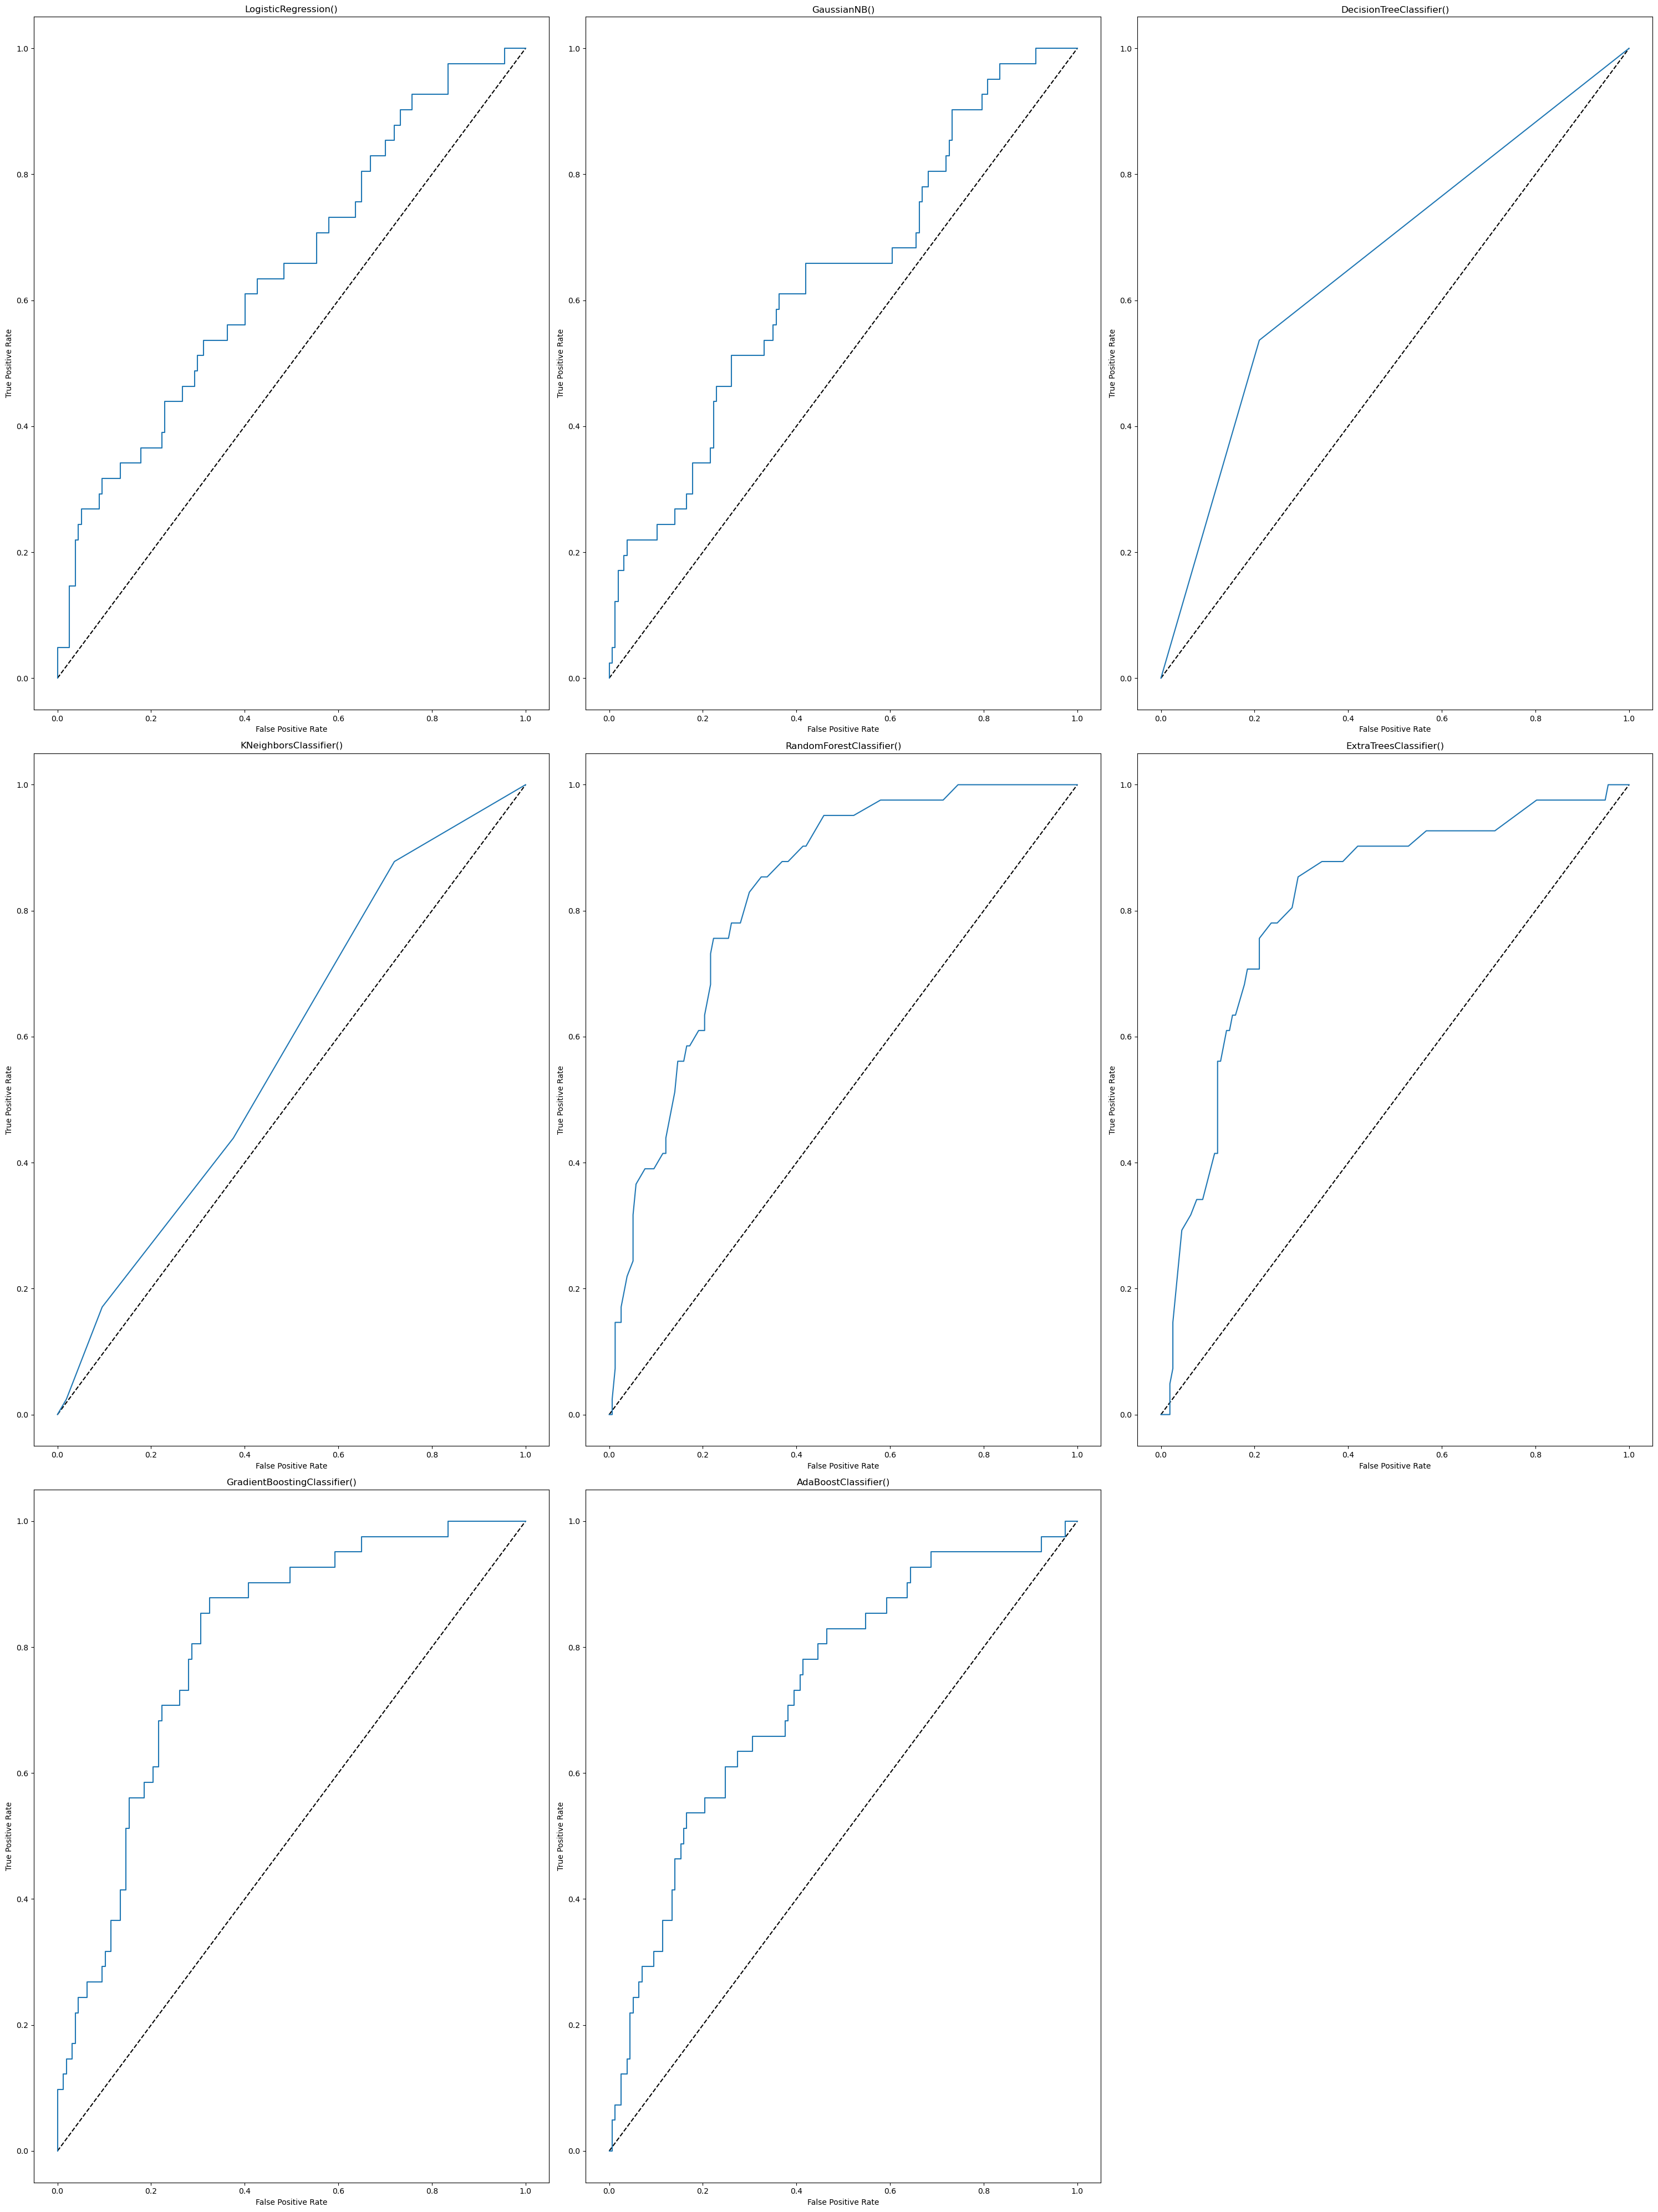

In [42]:
#Finding and priniting ROC Curve
plt.figure(figsize=(30,40))
model = [LogisticRegression(),GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

iterator=1
for m in model:
    if iterator <=9:
        ax=plt.subplot(3,3,iterator)
        m.fit(x_train,y_train)
        y_pred_prob=m.predict_proba(x_test)[:,1]
        fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr, label='Receiver Operating Characteristics')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(m)
    iterator+=1
plt.tight_layout()

# We will select GradientBoosting Classifier

Accuracy score of GradientBoosting Classifier is equal to RandomForest Classifier, but F1 Score and AUC Score of GradientBoosting Classifier is highest. 

## 6.4 Using cross_val model to find the best accuracy

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [44]:
model = [LogisticRegression(),GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

model_names = ["LogisticRegression", "GaussianNB","Decision Tree Classifier", "SVC", "KNeighbors Classifier","Random Forest Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier"]

k=5
cv=KFold(n_splits=k, shuffle=True, random_state=95)

result=[]

for m, name in zip(model,model_names):
    scores=cross_val_score(m, xnew, y, cv=cv, scoring='accuracy')
    avg_scores=scores.mean()
    result.append((name,avg_scores))

result_df=pd.DataFrame(result, columns=['Model','Avg Accuracy Score'])
print(result_df)

                          Model  Avg Accuracy Score
0            LogisticRegression            0.515649
1                    GaussianNB            0.728955
2      Decision Tree Classifier            0.709783
3                           SVC            0.753274
4         KNeighbors Classifier            0.693575
5      Random Forest Classifier            0.766405
6        Extra Trees Classifier            0.755294
7  Gradient Boosting Classifier            0.776491
8           AdaBoost Classifier            0.743157


## Gradient Boosting Classifier has the best accuracy in Cross_val_score
The accuracy score is better than train_test model and we can save our model on cross_val_model only

## 6.5 Fitting on actual data

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
ETC=ExtraTreesClassifier()
x_train, x_test, y_train, y_test=train_test_split(xnew, y, test_size=0.2, random_state=95)
ETC.fit(x_train,y_train)
pred=ETC.predict(x_test)
accuracy=accuracy_score(y_test,pred)
conf_matrix=confusion_matrix(y_test,pred)
class_report=classification_report(y_test, pred)

print("Accuracy:", accuracy)
print("\n")
print("Confusion Matrix:", conf_matrix)
print("\n")
print("Classification Report:") 
print(class_report)

Accuracy: 0.8080808080808081


Confusion Matrix: [[156   5]
 [ 33   4]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89       161
         1.0       0.44      0.11      0.17        37

    accuracy                           0.81       198
   macro avg       0.63      0.54      0.53       198
weighted avg       0.75      0.81      0.76       198



## 6.6 Hyper Paramter Tuning

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [1,100],
              'max_depth': [None, 5],
              'max_features':['auto','sqrt'],
              'random_state':[1,100],
             }
GBC=GradientBoostingClassifier()
GCV=GridSearchCV(GBC, parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 100], 'random_state': [1, 100]})

In [47]:
GCV.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 1}

## 6.7 Selecting the final model with best paramters

In [48]:
FinalModel_Classification=GradientBoostingClassifier(max_depth=None, max_features='sqrt', n_estimators=100, random_state=1)
FinalModel_Classification.fit(x_train,y_train)
pred=FinalModel_Classification.predict(x_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
auc_score=roc_auc_score(y_test, pred)
print(f"Accuracy Score: {acc*100}")
print(f"F1 Score: {f1*100}")
print(f"AUC Score: {auc_score*100}")

Accuracy Score: 82.82828282828282
F1 Score: 39.285714285714285
AUC Score: 62.380392815175426


# 7. Saving the best model

In [49]:
import joblib
joblib.dump(FinalModel_Classification,"Insurance Fraud.pkl")

['Insurance Fraud.pkl']